In [1]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image


def get_all_korean():

    def nextKorLetterFrom(letter):
        lastLetterInt = 15572643
        if not letter:
            return '가'
        a = letter
        b = a.encode('utf8')
        c = int(b.hex(), 16)

        if c == lastLetterInt:
            return False

        d = hex(c + 1)
        e = bytearray.fromhex(d[2:])

        flag = True
        while flag:
            try:
                r = e.decode('utf-8')
                flag = False
            except UnicodeDecodeError:
                c = c+1
                d = hex(c)
                e = bytearray.fromhex(d[2:])
        return e.decode()

    returns = []
    flag = True
    k = ''
    while flag:
        k = nextKorLetterFrom(k)
        if k is False:
            flag = False
        else:
            returns.append(k)
    return returns

def merge_img(img0, img1, img2):
    mmg = Image.new("L", (128*2, 128*2), 255)
    mmg.paste(img0, (0,0))
    mmg.paste(img1, (128,0))
    if img2 is not None:
        mmg.paste(img2, (64,128))
    return mmg.resize((96,96), Image.BILINEAR)

def get_imgs(fd, font, tag, letter):
    
    ch1_list = ['ㄱ', 'ㄱㄱ', 'ㄴ', 'ㄷ', 'ㄷㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅂㅂ', 'ㅅ', 'ㅅㅅ', 'ㅇ', 'ㅈ', 'ㅈㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    ch2_list = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    ch3_list = [None, 'ㄱ', 'ㄱㄱ', 'ㄱㅅ', 'ㄴ', 'ㄴㅈ', 'ㄴㅎ', 'ㄷ', 'ㄹ', 'ㄹㄱ', 'ㄹㅁ', 'ㄹㅂ', 'ㄹㅅ', 'ㄹㅌ', 'ㄹㅍ', 'ㄹㅎ', 'ㅁ', 'ㅂ', 'ㅂㅅ', 'ㅅ', 'ㅅㅅ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

    
    ch1 = (ord(letter) - ord('가'))//588
    ch2 = ((ord(letter) - ord('가')) - (588*ch1)) // 28
    ch3 = (ord(letter) - ord('가')) - (588*ch1) - 28*ch2
    
    p1 = f"{fd}/{font}/{font}__{tag}__{ch1_list[ch1]}1.png"
    p1 = p1 if os.path.exists(p1) else f"{fd}/{font}/{font}__{tag}__{ch1_list[ch1]}.png"
    img1 = Image.open(p1)
    
    p2 = f"{fd}/{font}/{font}__{tag}__{ch2_list[ch2]}2.png"
    p2 = p2 if os.path.exists(p2) else f"{fd}/{font}/{font}__{tag}__{ch2_list[ch2]}.png"
    img2 = Image.open(p2)

    if ch3_list[ch3] is not None:
        p3 = f"{fd}/{font}/{font}__{tag}__{ch3_list[ch3]}3.png"
        p3 = p3 if os.path.exists(p3) else f"{fd}/{font}/{font}__{tag}__{ch3_list[ch3]}.png"
        img3 = Image.open(p3)
    else:
        img3 = None

    return img1, img2, img3

In [2]:
partfd = "/home/jupyter/ai_font/data/test_parts"
assemblefd = "/home/jupyter/ai_font/data/test_handcut_assembled"
ak = get_all_korean()

In [4]:
font = "플레이브밤비"
tag = "closing"
os.makedirs(f"{assemblefd}/{font}", exist_ok=True)
for letter in ak:
    try:
        img0, img1, img2 = get_imgs(partfd, font, tag, letter)
        img = merge_img(img0,img1,img2)
        img.save(f"{assemblefd}/{font}/{font}__{tag}__{letter}.png")
    except FileNotFoundError:
        print(letter)

게
겍
겎
겏
겐
겑
겒
겓
겔
겕
겖
겗
겘
겙
겚
겛
겜
겝
겞
겟
겠
겡
겢
겣
겤
겥
겦
겧
께
껙
껚
껛
껜
껝
껞
껟
껠
껡
껢
껣
껤
껥
껦
껧
껨
껩
껪
껫
껬
껭
껮
껯
껰
껱
껲
껳
네
넥
넦
넧
넨
넩
넪
넫
넬
넭
넮
넯
넰
넱
넲
넳
넴
넵
넶
넷
넸
넹
넺
넻
넼
넽
넾
넿
데
덱
덲
덳
덴
덵
덶
덷
델
덹
덺
덻
덼
덽
덾
덿
뎀
뎁
뎂
뎃
뎄
뎅
뎆
뎇
뎈
뎉
뎊
뎋
떼
떽
떾
떿
뗀
뗁
뗂
뗃
뗄
뗅
뗆
뗇
뗈
뗉
뗊
뗋
뗌
뗍
뗎
뗏
뗐
뗑
뗒
뗓
뗔
뗕
뗖
뗗
레
렉
렊
렋
렌
렍
렎
렏
렐
렑
렒
렓
렔
렕
렖
렗
렘
렙
렚
렛
렜
렝
렞
렟
렠
렡
렢
렣
메
멕
멖
멗
멘
멙
멚
멛
멜
멝
멞
멟
멠
멡
멢
멣
멤
멥
멦
멧
멨
멩
멪
멫
멬
멭
멮
멯
베
벡
벢
벣
벤
벥
벦
벧
벨
벩
벪
벫
벬
벭
벮
벯
벰
벱
벲
벳
벴
벵
벶
벷
벸
벹
벺
벻
뻬
뻭
뻮
뻯
뻰
뻱
뻲
뻳
뻴
뻵
뻶
뻷
뻸
뻹
뻺
뻻
뻼
뻽
뻾
뻿
뼀
뼁
뼂
뼃
뼄
뼅
뼆
뼇
세
섹
섺
섻
센
섽
섾
섿
셀
셁
셂
셃
셄
셅
셆
셇
셈
셉
셊
셋
셌
셍
셎
셏
셐
셑
셒
셓
쎄
쎅
쎆
쎇
쎈
쎉
쎊
쎋
쎌
쎍
쎎
쎏
쎐
쎑
쎒
쎓
쎔
쎕
쎖
쎗
쎘
쎙
쎚
쎛
쎜
쎝
쎞
쎟
에
엑
엒
엓
엔
엕
엖
엗
엘
엙
엚
엛
엜
엝
엞
엟
엠
엡
엢
엣
엤
엥
엦
엧
엨
엩
엪
엫
제
젝
젞
젟
젠
젡
젢
젣
젤
젥
젦
젧
젨
젩
젪
젫
젬
젭
젮
젯
젰
젱
젲
젳
젴
젵
젶
젷
쩨
쩩
쩪
쩫
쩬
쩭
쩮
쩯
쩰
쩱
쩲
쩳
쩴
쩵
쩶
쩷
쩸
쩹
쩺
쩻
쩼
쩽
쩾
쩿
쪀
쪁
쪂
쪃
체
첵
첶
첷
첸
첹
첺
첻
첼
첽
첾
첿
쳀
쳁
쳂
쳃
쳄
쳅
쳆
쳇
쳈
쳉
쳊
쳋
쳌
쳍
쳎
쳏
케
켁
켂
켃
켄
켅
켆
켇
켈
켉
켊
켋
켌
켍
켎
켏
켐
켑
켒
켓
켔
켕
켖
켗
켘
켙
켚
켛
테
텍
텎
텏
텐
텑
텒
텓
텔
텕
텖
텗
텘
텙
텚
텛
템
텝
텞
텟
텠
텡
텢
텣
텤
텥
텦
텧
페
펙
펚
펛
펜
펝
펞
펟
펠
펡
펢
펣
펤
펥
펦
펧
펨
펩
펪
펫
펬
펭
펮
펯


In [3]:
font = "플레이브밤비"
tag = "closing"
get_imgs(partfd, font, tag, letter)

NameError: name 'letter' is not defined

In [ ]:
a = get_imgs("/home/jupyter/ai_font/data/train_parts", "트와이스나연", "dilate", "량")

In [6]:
len(os.listdir(f"{assemblefd}/{font}"))

7980

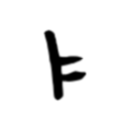

In [ ]:
a[1]

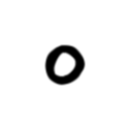

In [17]:
a[2]